In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

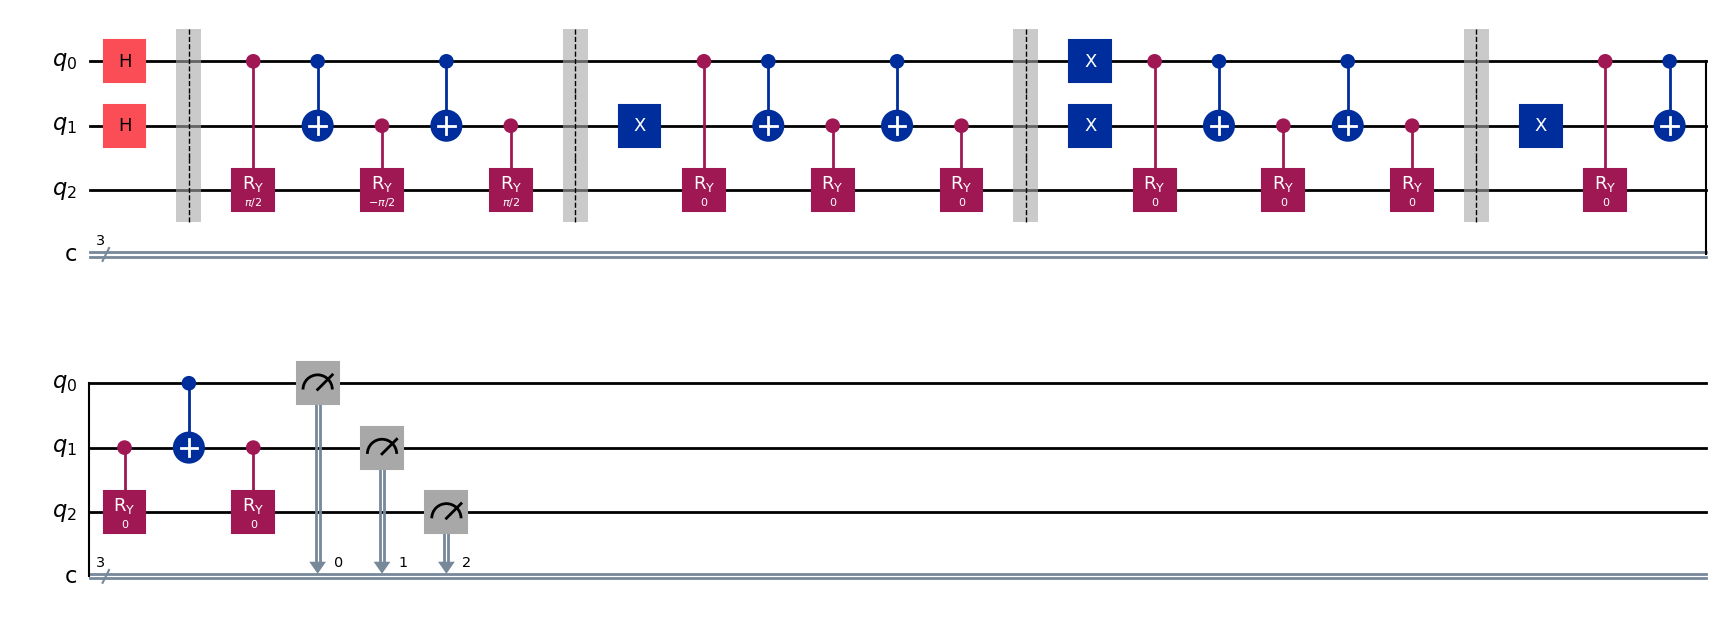

<Figure size 1000x600 with 0 Axes>

In [2]:
on = np.pi/2 # white pixel
off = 0 # black pixel

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.h(1)
qc.barrier()
qc.cry(on,0,2)
qc.cx(0,1)
qc.cry(-on,1,2)
qc.cx(0,1)
qc.cry(on,1,2)
qc.barrier()
qc.x(1)
qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)
qc.barrier()
qc.x(1)
qc.x(0)
qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)
qc.barrier()
qc.x(1)
qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)
qc.measure([0,1,2], [0,1,2])

# Draw the circuit
plt.figure(figsize=(10, 6))
qc.draw(output='mpl')

## Compressed Version of A Circuit

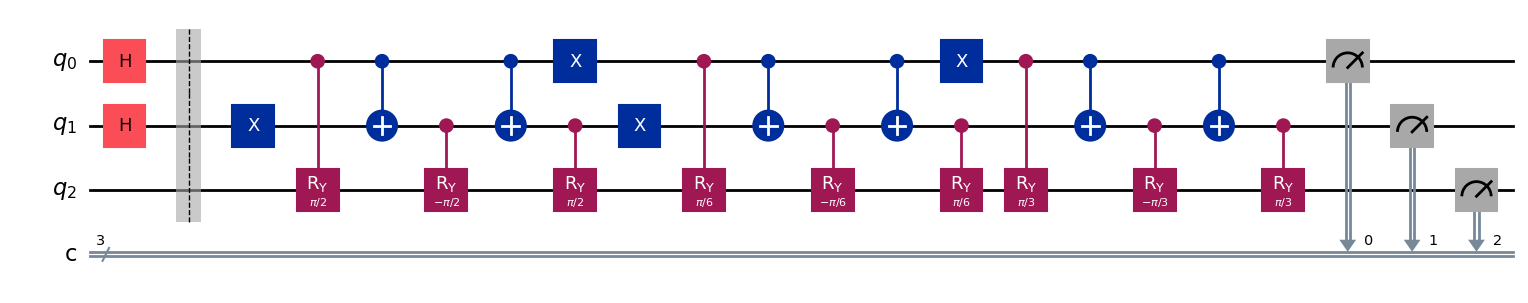

<Figure size 1000x600 with 0 Axes>

In [3]:
theta = (np.pi/2)/3 # pixel value 1

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.h(1)
qc.barrier()
qc.x(1)
qc.cry(theta*3,0,2)
qc.cx(0,1)
qc.cry(-theta*3,1,2)
qc.cx(0,1)
qc.cry(theta*3,1,2)
qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.x(0)
qc.cry(theta*2,0,2)
qc.cx(0,1)
qc.cry(-theta*2,1,2)
qc.cx(0,1)
qc.cry(theta*2,1,2)
qc.measure([0,1,2], [0,1,2])

# Draw the circuit
plt.figure(figsize=(10, 6))
qc.draw(output='mpl')

{'101': 978, '111': 770, '010': 772, '000': 1042, '110': 261, '011': 273}


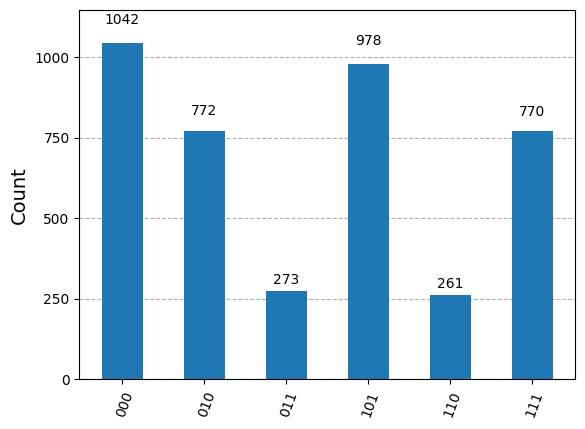

In [4]:
simulator = AerSimulator()
job = simulator.run(qc, shots=4096)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

[[0, 1.0], [0.2526621490803485, 0.738255033557047]]


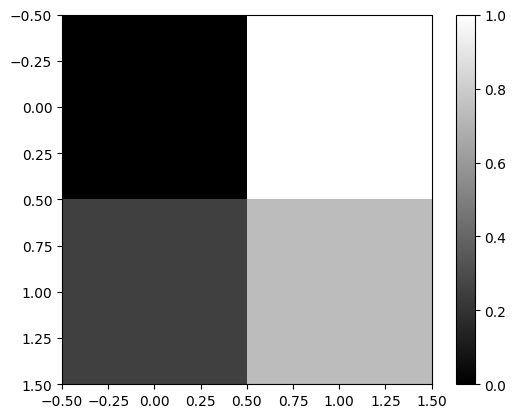

In [5]:
image = [[0, 0], [0, 0]]
count_sum = [[0, 0], [0, 0]]

for x in counts:
   if x[1:] == '00':
       count_sum[0][0] += counts[x]
   elif x[1:] == '01':
       count_sum[0][1] += counts[x]
   elif x[1:] == '10':
       count_sum[1][0] += counts[x]
   elif x[1:] == '11':
       count_sum[1][1] += counts[x]

for x in counts:
   if x[0] == '1':
       image[int(x[1])][int(x[2])] = counts[x] / count_sum[int(x[1])][int(x[2])]
       
print(image)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()